# Project #1

**Matias Cinera**

In [2]:
import random
import time
import sys
sys.setrecursionlimit(2**31-1)
#################################### 
# # # # Provided Functions # # # # #
####################################
def random_state_generator(n):
  numbers = []
  for i in range(2*n+1):
    numbers.append([random.randint(1,9) for _ in range(n+i%2)])
  state = []
  for i in range(n):
    for j in range(n):
      state.append([numbers[i*2][j], numbers[i*2+1][j+1], numbers[i*2+2][j], numbers[i*2+1][j]])
  random.shuffle(state)
  return state

def print_state(state, n):
  #line
  print('╔', end='')
  for i in range(n):
    print('═══', end='╦' if i < n-1 else '╗\n')
  for i in range(n):
    # first line of tile
    print('║', end='')
    for j in range(n):
      k = i*n+j
      print('╲{}╱║'.format(state[k][0]), end='' if j < n-1 else '\n')
    # second line of tile
    print('║', end='')
    for j in range(n):
      k = i*n+j
      print('{}╳{}║'.format(state[k][3], state[k][1]), end='' if j < n-1 else '\n')
    # third line of tile
    print('║', end='')
    for j in range(n):
      k = i*n+j
      print('╱{}╲║'.format(state[k][2]), end='' if j < n-1 else '\n')
    # line
    print('╠' if i < n-1 else '╚', end='')
    for j in range(n):
      print('═══', end='╬' if i < n-1 and j < n-1 else '╩' if i == n-1 and j < n-1 else '╣\n' if i < n-1 else '╝\n')

def check_state(state, n):
  for i in range(n):
    for j in range(n):
      # check the 4 neighbors of each tile
      if i > 0 and state[(i-1)*n+j][2] != state[i*n+j][0]:
        return False
      if j > 0 and state[i*n+j-1][1] != state[i*n+j][3]:
        return False
      if i < n-1 and state[(i+1)*n+j][0] != state[i*n+j][2]:
        return False
      if j < n-1 and state[i*n+j+1][3] != state[i*n+j][1]:
        return False
  return True

# Uninformed Search  
DFS Traversal implementation
- **search state space**  
    **All the Tiles/Dominos, the whole matrix**  
    Each iteration of the algorithm checks if the current state is the solution, if not just keep recursing
- **successor function**  
    - Check_state   
    If check state returns false, it will just keep recuring in a DFS order. Therefore, it will keep recuring n! times.
    

In [36]:
#DFS traversal 
def swap(arr, i, j):
    temp = arr[i]
    arr[i] = arr[j]
    arr[j] = temp
    return arr

def uninformed(current_state, n):
    for i in range(0, n*n): # put all tiles on the first index and expand them
        current_state = swap(current_state, 0, i)
        search(current_state, 1, n)
        global count
        if count > 0:
            return None
        current_state = swap(current_state, 0, i)

        
def search(current_state, index, n):
    global count, expanded_states, answer
    if count > 0: # solution found no need to keep going
        return None
    else:
        expanded_states += 1
        if check_state(current_state, n): # Print the solution if its found
            count += 1 # solution found, increment count
            temp_arr = current_state.copy()
            answer = temp_arr
        else:
            for i in range(index, n*n):
                current_state = swap(current_state, index, i)
                search(current_state, index+1, n)
                current_state = swap(current_state, index, i)

start = time.time()
answer = []
expanded_states = 0
count = 0 # incerment count after each solution is found, stop the search if count > 0
size = 3    # n = size of rows % columns

matrix = random_state_generator(size)
uninformed(matrix, size)
print_state(answer, size)
print(f'Number of expanded states: {expanded_states}')
end = time.time()
print("time {}".format(end-start))
print("------------------------------------------------------------------------")
####################################
# AVG-ExpandedStates & SuccessRate #
####################################
average_es = 0
success_rate = 0
answer = []
expanded_states = 0
count = 0
size = 3 
matrix = random_state_generator(size)
start = time.time()
for i in range(100):
    answer = []
    expanded_states = 0
    count = 0
    size = 3 
    matrix = random_state_generator(size)
    uninformed(matrix, size)
    if(check_state(answer, 3)):
        success_rate += 1
    average_es += expanded_states
end = time.time()
print("100 runs time: {}".format(end-start))
print(f'Average # of expanded states (100 runs): {average_es/100}')
print(f'Success Rate: {success_rate}%')

╔═══╦═══╦═══╗
║╲9╱║╲7╱║╲7╱║
║2╳9║9╳7║7╳8║
║╱9╲║╱3╲║╱4╲║
╠═══╬═══╬═══╣
║╲9╱║╲3╱║╲4╱║
║9╳1║1╳4║4╳8║
║╱4╲║╱8╲║╱5╲║
╠═══╬═══╬═══╣
║╲4╱║╲8╱║╲5╱║
║8╳3║3╳1║1╳8║
║╱9╲║╱1╲║╱5╲║
╚═══╩═══╩═══╝
Number of expanded states: 499330
time 1.073058843612671
------------------------------------------------------------------------
100 runs time: 105.5702154636383
Average # of expanded states (100 runs): 499027.97
Success Rate: 100%


# Uninformed**: UCS
**I WILL NOT BE USING THIS UNINFORMED IMPLEMENTATION FOR THE COMPARION**  
The following code is an implementation of UCS. However, since its using a **cost**   
**function** that compares the neighbors to evaluate the cost this could possibly mean  
this implementation is informed.

**I WILL NOT BE USING THIS UNINFORMED IMPLEMENTATION FOR THE COMPARION**  
Is just here for comparison sake between the two uninformed.

In [17]:
def state_cost(state, n): # helper function, look at the current cost
    cost = 0
    for i in range(n):
        for j in range(n): # basically the provided check_state function
            # check the neighbors of each tile, increment cost if neighbor is invalid
            if i > 0 and state[(i-1)*n+j][2] != state[i*n+j][0]:
                cost += 1
            if j > 0 and state[i*n+j-1][1] != state[i*n+j][3]:
                cost += 1
            if i < n-1 and state[(i+1)*n+j][0] != state[i*n+j][2]:
                cost += 1
            if j < n-1 and state[i*n+j+1][3] != state[i*n+j][1]:
                cost += 1
    return cost // 2 # faster avg time

# based on ucs from class, use a stack instaed of a priority queue
def dfs(state, n):
    stack = [[state, state_cost(state, n)]]
    explored_tiles = []
    expanded_states = 0
    while stack:    # while stack is not empty
        current_state = stack[0][0]
        stack.pop(0)
        if current_state in explored_tiles:
            continue
        expanded_states += 1
        explored_tiles.append(current_state)

        if check_state(current_state, n):
            return current_state, expanded_states
        
        for i in range(n*n):
            for j in range(n*n):
                temp = current_state.copy()
                temp[i], temp[j] = temp[j], temp[i]

                if temp not in explored_tiles and i!=j:
                    stack.append([temp, state_cost(temp, n)])
                else:
                    pass

        stack.sort(key=lambda x: x[1]) # sort based on the cost
    return None

size = 3
start = time.time()
state = random_state_generator(size)
answer, expanded_states = dfs(state, size)
end = time.time()
print("time {}".format(end-start))
print_state(answer, size)
print(f'Number of expanded states: {expanded_states}')

time 0.08917069435119629
╔═══╦═══╦═══╗
║╲9╱║╲3╱║╲8╱║
║6╳6║6╳5║5╳5║
║╱2╲║╱5╲║╱9╲║
╠═══╬═══╬═══╣
║╲2╱║╲5╱║╲9╱║
║6╳6║6╳9║9╳9║
║╱5╲║╱4╲║╱1╲║
╠═══╬═══╬═══╣
║╲5╱║╲4╱║╲1╱║
║9╳3║3╳6║6╳5║
║╱4╲║╱8╲║╱4╲║
╚═══╩═══╩═══╝
Number of expanded states: 69


# Local Search  
- **search state space**
    - n – (i) dominos --> given that **i > 1** and **i =< n-2**    
    Explanation & Algorithm Strategy:  
    Look through all possible combinations of the matrix, however, if one path it’s not a possible solution stop searching.  
    The traversal path will be done by increasing the current index (start at index 0).Then reclusively filling the next ones.  
    Therefore, any current search space can only have n – (i) dominos,  
    since at i-2 you either have a solution or not.
- **successor function**  
    - Check the previous neighbors (all the neighbors at index less than i)
    Explanation:  
    This algorithm can’t go to the next state unless the previous neighbors are valid.  
    This is because its recursing over the index in increasing order.  
    Therefore the only way to recurse is to check the previous neighbors, otherwise its impossible that the current state will be a solution.  
    The function does not carea about the previous or next state. It only evaluates 2 neighbors, if they are valid proceed to the next state.    

Example: 
 

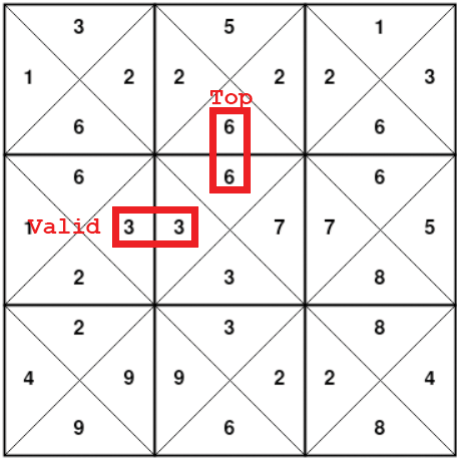  
Explanation  
In this example, the current index is 4.  
The two previous neighbors are valid; therefore, we can go to the next state.

In [12]:
# creates a list of the left indexes of a given nxn matrix
def generate_left(n):
    left_int = 0
    left = []
    for i in range(n):
        left.append(left_int)
        left_int += n;
    return left

# checks if the previous 2 neighbors are valid (tiles to the left, and up)
def prev_neighbors(state, i, n):
    if(i-n >= 0): # check up
        if(state[i][0] != state[i-n][2]):
            return False
        
    if(i not in left): # left
        if(state[i][3] != state[i-1][1]):
            return False
    
    return True

# swaps the value of two indexes of a list

def swap(arr, i, j):
    temp = arr[i]
    arr[i] = arr[j]
    arr[j] = temp
    return arr

def bootleg_dfs(current_state, n):
    for i in range(0, n*n): # put all tiles on the first index and expand them
        current_state = swap(current_state, 0, i)
        search(current_state, 1, n)
        global count
        if count > 0:
            return None
        current_state = swap(current_state, 0, i)

        
def search(current_state, index, n):
    global count, expanded_states, answer
    if count > 0: # solution found no need to keep going
        return None
    else:
        expanded_states += 1
        if check_state(current_state, n): # Print the solution if its found
            count += 1 # solution found, increment count
            temp_arr = current_state.copy()
            answer = temp_arr
        else:    
            for i in range(index, n*n):
                current_state = swap(current_state, index, i)
                if prev_neighbors(current_state, index, n): # acting as a cost function, will always choose the best "cost" 
                    search(current_state, index+1, n)       # only expand if the current tile has valid prev neighbors
                current_state = swap(current_state, index, i)


start = time.time()
answer = []
expanded_states = 0
count = 0 # incerment count after each solution is found, stop the search if count > 0
size = 6    # n = size of rows % columns
left = generate_left(size)
matrix = random_state_generator(size)

bootleg_dfs(matrix, size)
print_state(answer, size)
print(f'Number of expanded states: {expanded_states}')
end = time.time()
print("time {}".format(end-start))
print("------------------------------------------------------------------------")
####################################
# AVG-ExpandedStates & SuccessRate #
####################################
average_es = 0
success_rate = 0
answer = []
expanded_states = 0
count = 0
size = 6 
left = generate_left(size)
matrix = random_state_generator(size)


start = time.time()
for i in range(100):
    answer = []
    expanded_states = 0
    count = 0
    left = generate_left(size)
    matrix = random_state_generator(size)
    bootleg_dfs(matrix, size)
    if(check_state(answer, size)):
        success_rate += 1
    average_es += expanded_states
end = time.time()
print("100 runs time: {}".format(end-start))
print(f'Average # of expanded states (100 runs): {average_es/100}')
print(f'Success Rate: {success_rate}%')

╔═══╦═══╦═══╦═══╦═══╦═══╗
║╲7╱║╲3╱║╲6╱║╲5╱║╲6╱║╲7╱║
║5╳5║5╳4║4╳8║8╳1║1╳9║9╳8║
║╱6╲║╱1╲║╱6╲║╱4╲║╱9╲║╱2╲║
╠═══╬═══╬═══╬═══╬═══╬═══╣
║╲6╱║╲1╱║╲6╱║╲4╱║╲9╱║╲2╱║
║8╳1║1╳6║6╳1║1╳9║9╳1║1╳7║
║╱5╲║╱2╲║╱4╲║╱2╲║╱3╲║╱8╲║
╠═══╬═══╬═══╬═══╬═══╬═══╣
║╲5╱║╲2╱║╲4╱║╲2╱║╲3╱║╲8╱║
║2╳2║2╳4║4╳2║2╳7║7╳9║9╳2║
║╱8╲║╱3╲║╱7╲║╱2╲║╱2╲║╱9╲║
╠═══╬═══╬═══╬═══╬═══╬═══╣
║╲8╱║╲3╱║╲7╱║╲2╱║╲2╱║╲9╱║
║9╳8║8╳3║3╳6║6╳7║7╳7║7╳4║
║╱7╲║╱5╲║╱2╲║╱7╲║╱3╲║╱7╲║
╠═══╬═══╬═══╬═══╬═══╬═══╣
║╲7╱║╲5╱║╲2╱║╲7╱║╲3╱║╲7╱║
║2╳4║4╳6║6╳8║8╳2║2╳3║3╳8║
║╱6╲║╱9╲║╱7╲║╱9╲║╱6╲║╱3╲║
╠═══╬═══╬═══╬═══╬═══╬═══╣
║╲6╱║╲9╱║╲7╱║╲9╱║╲6╱║╲3╱║
║4╳1║1╳4║4╳5║5╳1║1╳6║6╳7║
║╱6╲║╱3╲║╱6╲║╱8╲║╱3╲║╱2╲║
╚═══╩═══╩═══╩═══╩═══╩═══╝
Number of expanded states: 178695
time 4.77681040763855
------------------------------------------------------------------------
100 runs time: 811.0333826541901
Average # of expanded states (100 runs): 309507.89
Success Rate: 100%


# Informed Search
- **search state space**  
    **All the Tiles/Dominos, the whole matrix**  
    Each iteration of the algorithm checks the entire matrix and evaluates the cost
- **successor function**  
    Not a function, just pop the top of the stack.  
    Properly add the lower cost to the top of the stack based on the hueristic function. 

- **heuristic function**  
    - **Compare the current state with the solution, return a cost**  
    This function compares the given solution in the input with the current state.  
    The higher the number of missmatch neighbors, the higher the cost  

In [39]:
def random_state_with_solution(n):
    # generates a random state and the solution
    numbers = []
    for i in range(2*n+1):
        numbers.append([random.randint(1,n*n) for _ in range(n+i%2)])

    state = []
    for i in range(n):
        for j in range(n):
            state.append([numbers[i*2][j], numbers[i*2+1][j+1], numbers[i*2+2][j], numbers[i*2+1][j]])
    solution = state.copy()
    random.shuffle(state)
    return state, solution


def heuristic_func(state, solution, n):
    cost = 0
    for i in range(n*n):    # increment the cost if the tile does not match with the solution
        if state[i] != solution[i]:
            cost += 1
    return cost

# based on a-star from class
def informed_search(state, answer, n):
    expanded_states = 0
    stack = [[state, heuristic_func(state, answer, n)]]
    while stack:
        current_state = stack[0][0]
        expanded_states += 1
        stack.pop(0)
        temp_list = []
        if check_state(current_state, n):
            return answer, expanded_states
        for i in range(n*n):
            if state[i] != answer[i]: # find a possible one
                for j in range(n*n):
                    if j!= i:
                        temp = current_state.copy()
                        temp[i], temp[j] = temp[j], temp[i]
                        temp_list.append([temp, heuristic_func(temp, answer, n)])
        stack.extend(temp_list)
        stack.sort(key=lambda x: x[1])

    return answer
size = 6
start = time.time()
state, solution = random_state_with_solution(6)
answer, expanded_states = informed_search(state, solution, 6)
end = time.time()

print("time {}".format(end-start))
print_state(answer, 6)
print(f'Number of expanded states: {expanded_states}')
print("------------------------------------------------------------------------")
####################################
# AVG-ExpandedStates & SuccessRate #
####################################
average_es = 0
success_rate = 0
start = time.time()

for i in range(100):
    state, solution = random_state_with_solution(6)
    answer, expanded_states = informed_search(state, solution, 6)
    average_es += expanded_states
    if(check_state(answer, 6)):
        success_rate += 1
end = time.time()

print("100 runs time: {}".format(end-start))
print(f'Average # of expanded states (100 runs): {average_es/100}')
print(f'Success Rate: {success_rate}%')

time 0.48119449615478516
╔═══╦═══╦═══╦═══╦═══╦═══╗
║╲24╱║╲27╱║╲24╱║╲33╱║╲16╱║╲9╱║
║15╳16║16╳9║9╳31║31╳2║2╳8║8╳20║
║╱20╲║╱30╲║╱19╲║╱16╲║╱19╲║╱31╲║
╠═══╬═══╬═══╬═══╬═══╬═══╣
║╲20╱║╲30╱║╲19╱║╲16╱║╲19╱║╲31╱║
║30╳20║20╳7║7╳5║5╳29║29╳28║28╳32║
║╱22╲║╱21╲║╱32╲║╱26╲║╱26╲║╱7╲║
╠═══╬═══╬═══╬═══╬═══╬═══╣
║╲22╱║╲21╱║╲32╱║╲26╱║╲26╱║╲7╱║
║15╳9║9╳7║7╳2║2╳29║29╳4║4╳30║
║╱27╲║╱25╲║╱32╲║╱7╲║╱28╲║╱5╲║
╠═══╬═══╬═══╬═══╬═══╬═══╣
║╲27╱║╲25╱║╲32╱║╲7╱║╲28╱║╲5╱║
║20╳32║32╳3║3╳7║7╳11║11╳2║2╳35║
║╱6╲║╱7╲║╱20╲║╱16╲║╱17╲║╱32╲║
╠═══╬═══╬═══╬═══╬═══╬═══╣
║╲6╱║╲7╱║╲20╱║╲16╱║╲17╱║╲32╱║
║23╳3║3╳33║33╳20║20╳11║11╳20║20╳28║
║╱32╲║╱32╲║╱12╲║╱18╲║╱23╲║╱7╲║
╠═══╬═══╬═══╬═══╬═══╬═══╣
║╲32╱║╲32╱║╲12╱║╲18╱║╲23╱║╲7╱║
║16╳10║10╳14║14╳19║19╳30║30╳8║8╳2║
║╱24╲║╱12╲║╱14╲║╱31╲║╱15╲║╱32╲║
╚═══╩═══╩═══╩═══╩═══╩═══╝
Number of expanded states: 32
------------------------------------------------------------------------
100 runs time: 45.89910936355591
Average # of expanded states (100 runs): 32.66
Success Rate: 100%


# Comparing Performance
- 3x3 Matrix 100 runs
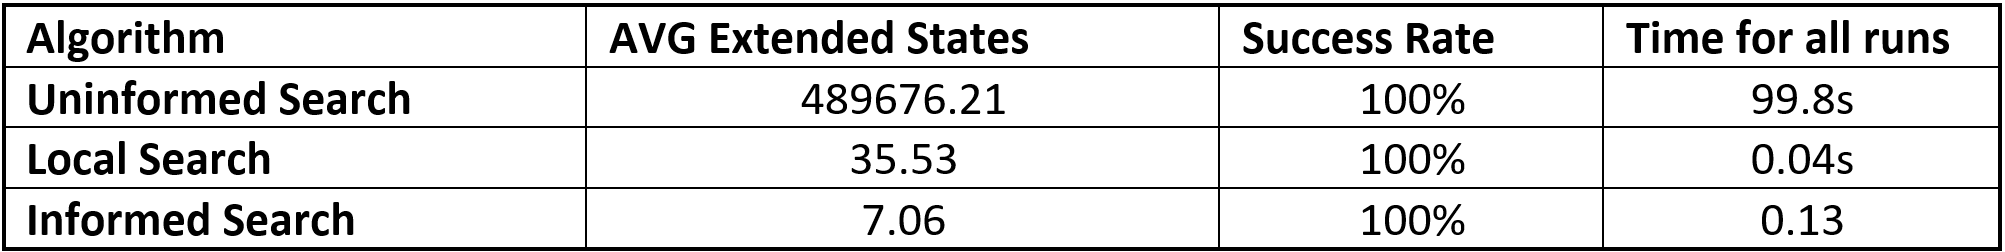

- 6x6 Matrix 100 runs
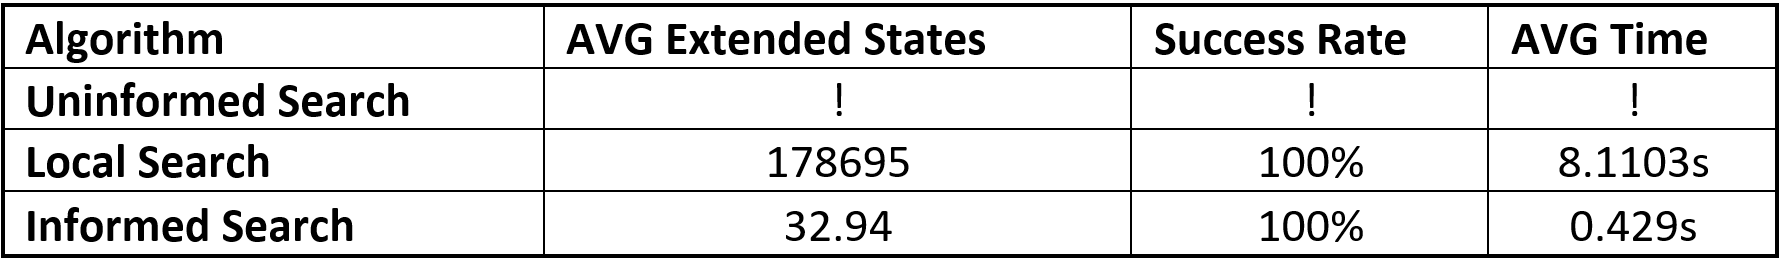

Since the **informed algorithm** is just a DFS traversal, the complexity is will be O(n!)  
Because of this I couldnt test it with any matrix larger than 4x4. A 4 by 4 matrix takes more than 15 minutes to solve, its pointless to compare it since I already know its the worst of all. I tried to optimize it by shuffling the dfs order, but the avg results where the same. Therefore, the **uninformed algorithm** is the worst by far.

The best algorithm **informed search**, this is expected since the solution state is used by the heuristic function to optimize chosen states to explore and return an optimized cost for each state. This is also why it has the least number of expanded spaces in both tests. This algorithm is a variation of UCS and A start search.
  
My **local search** function has an optimized successor function. The successor function can determine that the current state is not a solution with only 2 tiles. Therefore, it is much faster than uninformed search. This is possible because each state only keeps track of 2 neighbors (not all 4) and doesn’t keep track of the path. This function is also a DFS traversal, but the difference is that most of the traversal paths are stopped. This is why my **local search** is much faster than the **uninformed search**.